# Linear Regression

## $$\mathcal{L}(\beta) = \sum_{i=1}^n \epsilon_i^2 =  (y-X\beta)^T(y-X\beta)$$

In [1]:
from sklearn.datasets import load_boston
from IPython.display import Image

In [2]:
cd ..

/home/jovyan/cap


In [3]:
%run lib/imports.py

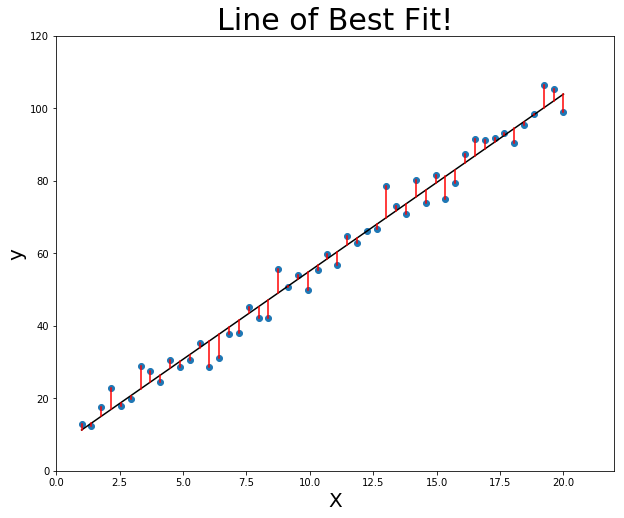

In [4]:
Image('lib/images/lob.png')

## Using the Boston housing dataset from Sklearn

In [5]:
data = load_boston()

In [6]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

### Features


| Name   | Description                                                           | Type      |
| ------ |:--------------------------------------------------------------------- | --------- |
|CRIM    | per capita crime rate by town                                         |Continuous |                   
|ZN      | proportion of residential land zoned for lots over 25,000 sq.ft.      |Continuous |
|INDUS   | proportion of non-retail business acres per town                      |Continuous |
|CHAS    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |Categorical|
|NOX     | nitric oxides concentration (parts per 10 million)                    |Continuous |
|RM      | average number of rooms per dwelling                                  |Categorical|
|AGE     | proportion of owner-occupied units built prior to 1940                |Continuous |
|DIS     | weighted distances to five Boston employment centres                  |Continuous |
|RAD     | index of accessibility to radial highways                             |Categorical|
|TAX     | full-value property-tax rate per \$10,000                             |Continuous |
|PTRATIO | pupil-teacher ratio by town                                           |Continuous |
|B       | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town        |Continuous |
|LSTAT   | % lower status of the population                                      |Continuous |
|MEDV    | Median value of owner-occupied homes in $1000's                       |Continuous |



##### Feature notes:

* Radial highway - An arterial highway leading to or from an urban center.

In [7]:
columns = data.feature_names

trg_col = ['Median_Value']

In [8]:
bos_data = pd.DataFrame(data.data, columns=columns)
bos_target = pd.DataFrame(data.target, columns=trg_col )

In [9]:
bos_data.shape, bos_target.shape

((506, 13), (506, 1))

In [10]:
bos_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
bos_target.head()

,Median_Value
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Data Visualisation

In [12]:
%matplotlib inline

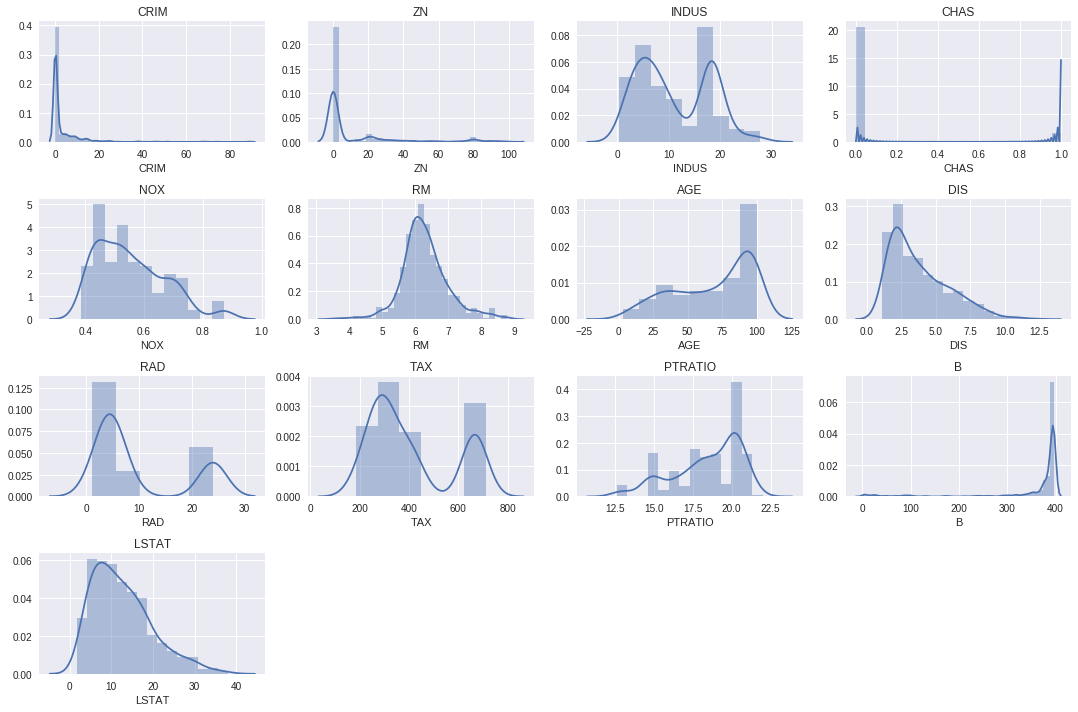

In [13]:
fig = plt.figure(figsize=(15,10))

i = 0
for col in bos_data.columns:
    i += 1
    fig.add_subplot(4,4,i)
    sns.distplot(bos_data[col])
    plt.title(col)

plt.tight_layout()

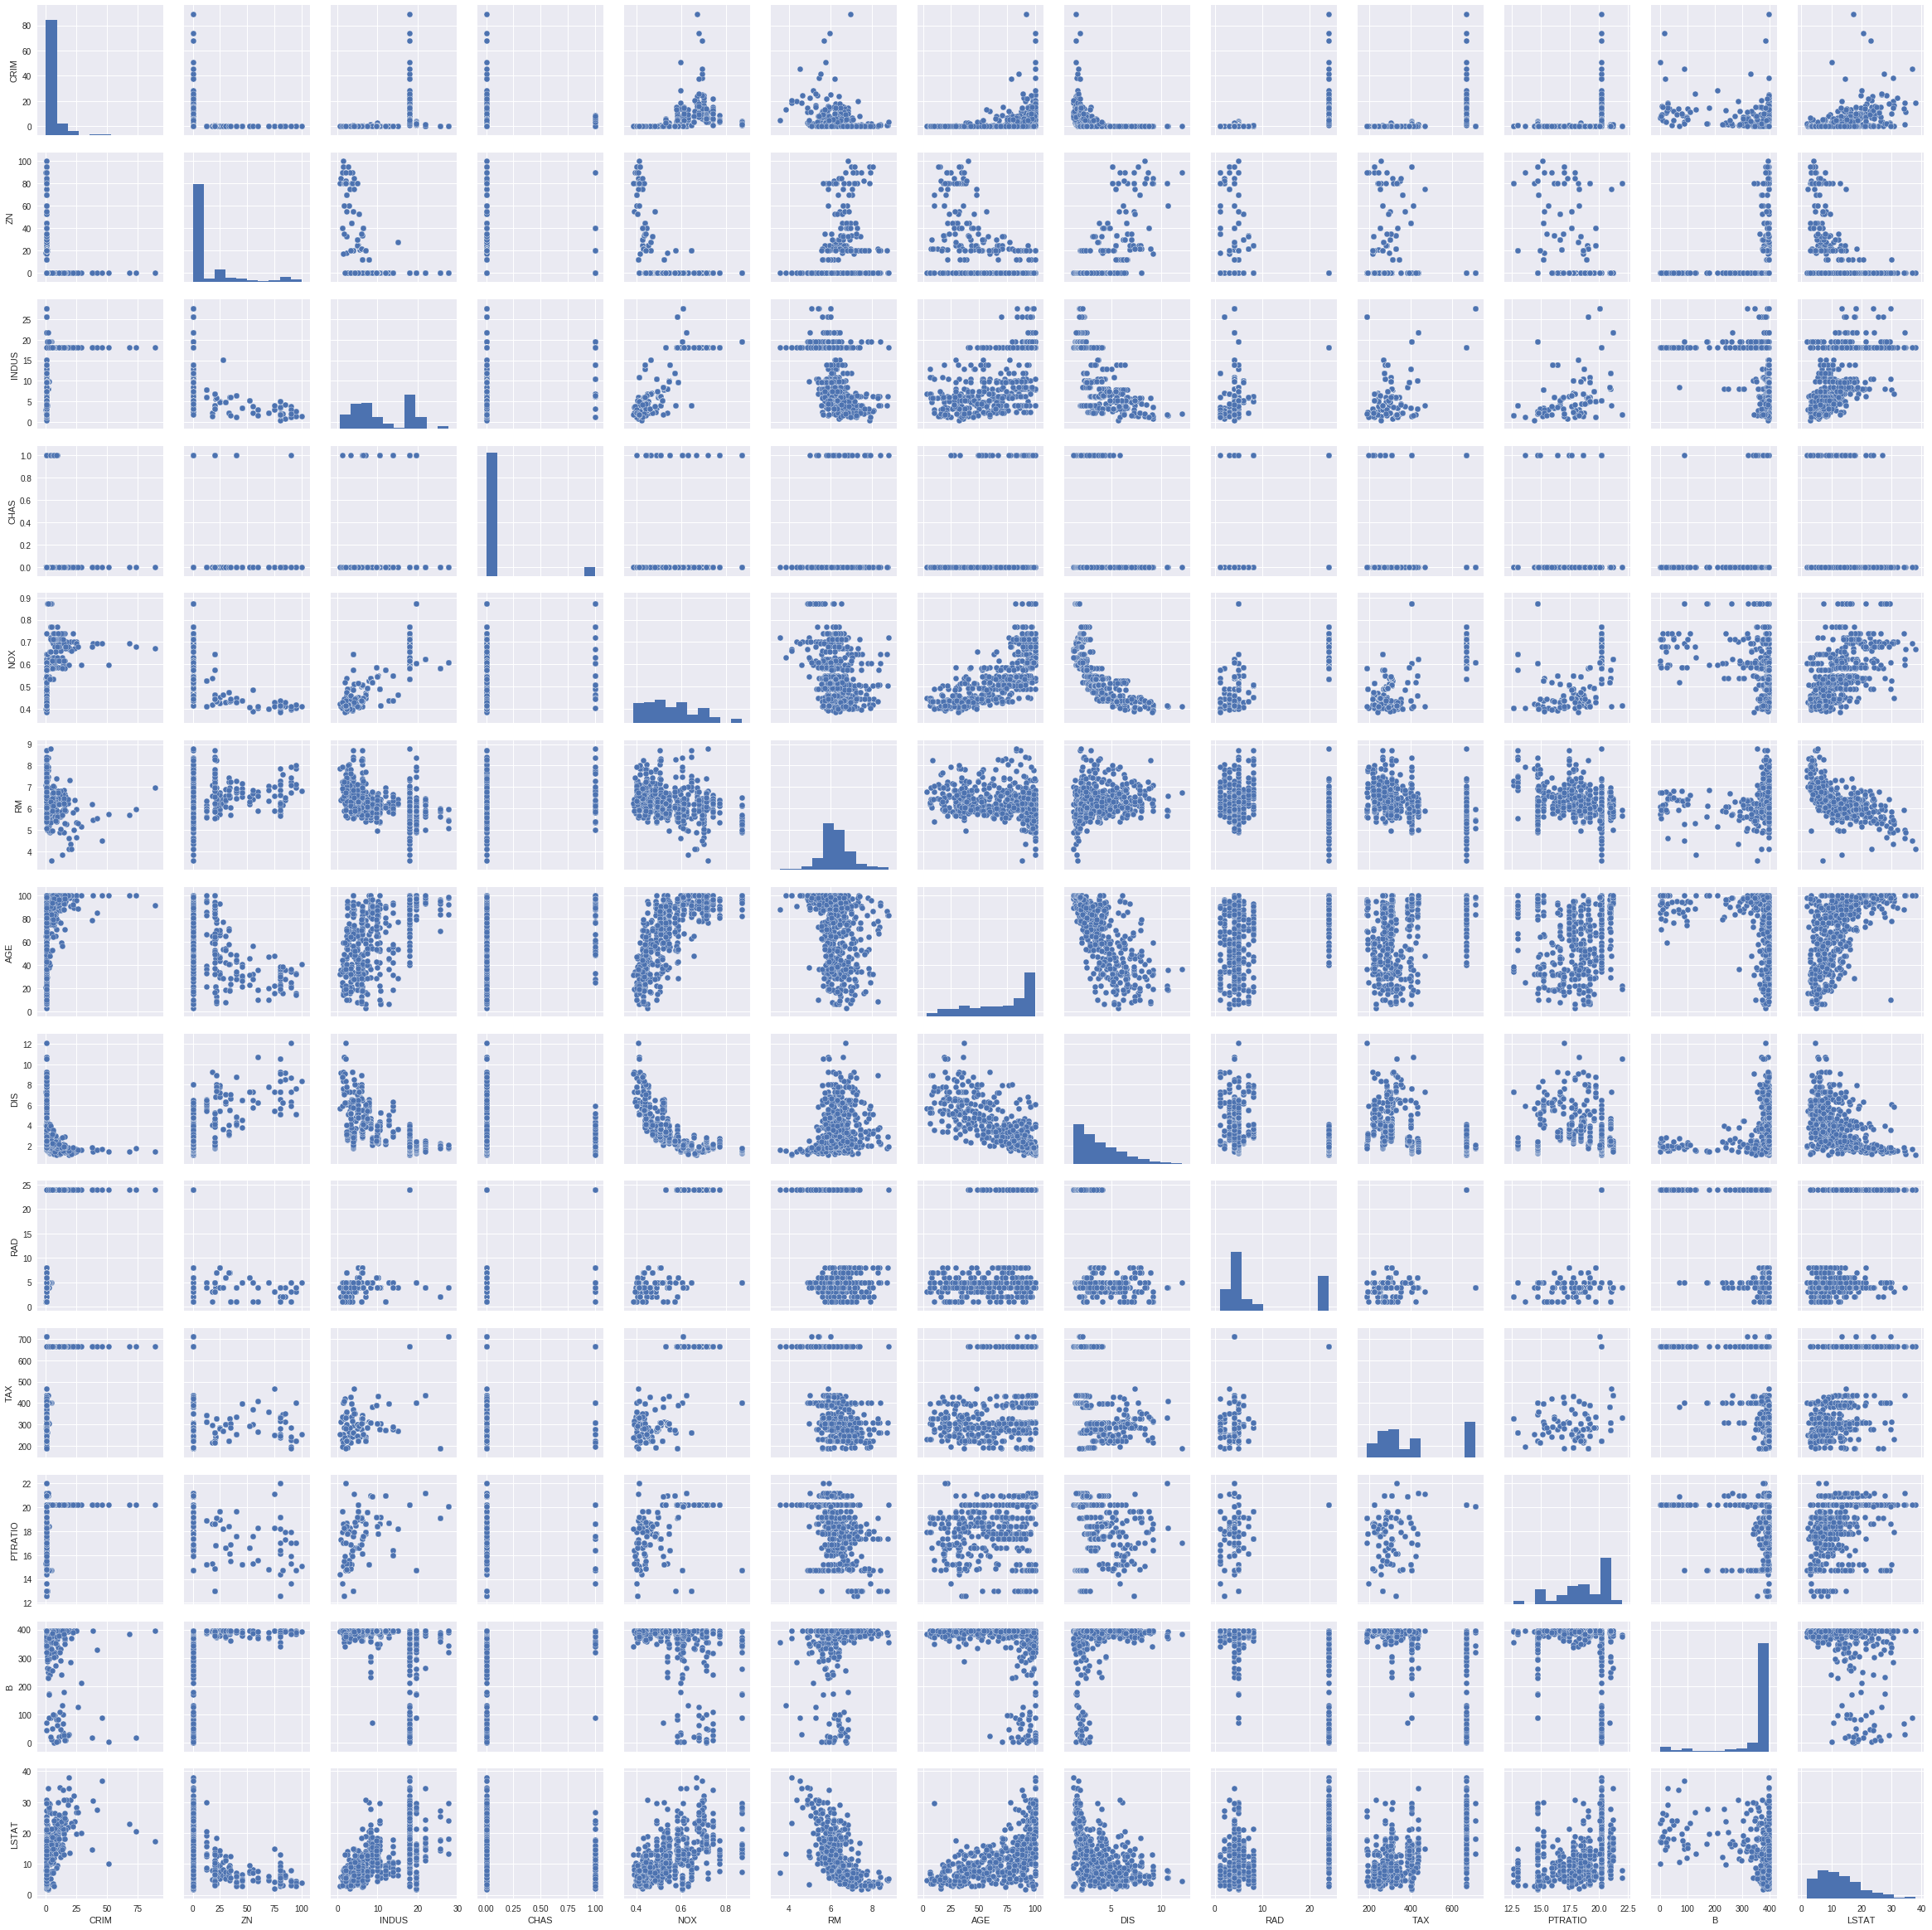

In [14]:
sns.pairplot(bos_data)

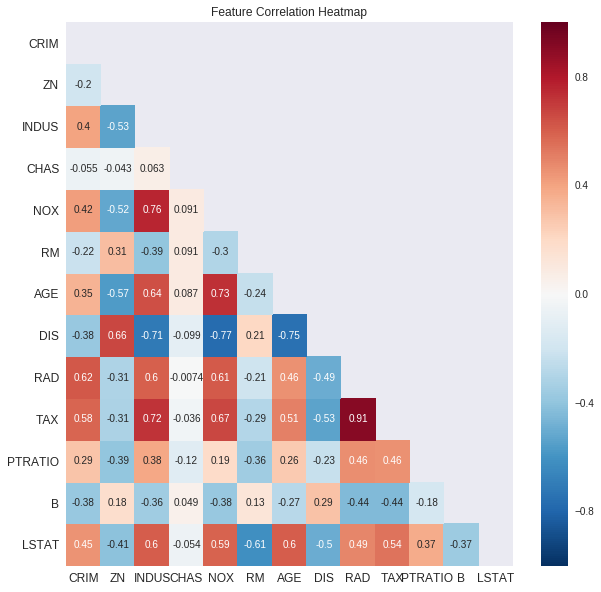

In [15]:
fix, ax = plt.subplots(figsize=(10,10))

bos_corr = bos_data.corr()

mask = np.zeros_like(bos_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(bos_corr, mask=mask, ax=ax, annot=True)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)
plt.title('Feature Correlation Heatmap')
plt.show()

## Comparing custom linear regression model to the one in scikit learn

In [16]:
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
from lib.models.Linear_Regression import Linear_Regression

In [19]:
X_tr, X_ts, y_tr, y_ts = train_test_split(bos_data, bos_target, test_size=.25)

#### Score Comparison

In [20]:
sci_LR = LinearRegression()
sci_LR.fit(X_tr, y_tr)
sci_LR.score(X_ts, y_ts)

0.7323738327571081

In [21]:
my_LR = Linear_Regression()
my_LR.fit(X_tr, y_tr)
my_LR.score(X_ts, y_ts)

0.73237383275712364

In [22]:
my_LR = Linear_Regression()
my_LR.fit(X_tr, y_tr, reg=True, alpha=1)
my_LR.score(X_ts, y_ts)

0.72719019603867119

#### Time Comparison

In [23]:
%%timeit
sci_LR = LinearRegression()
sci_LR.fit(X_tr, y_tr)
sci_LR.score(X_ts, y_ts)

790 µs ± 43.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
%%timeit
my_LR = Linear_Regression()
my_LR.fit(X_tr, y_tr)
my_LR.score(X_ts, y_ts)

315 µs ± 60.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
%%timeit
my_LR = Linear_Regression()
my_LR.fit(X_tr, y_tr, reg=True, alpha=1)
my_LR.score(X_ts, y_ts)

363 µs ± 108 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Memory Comparison

For the memory comparison test a new docker container and jupyter notebook were used. Only modules that were required to run the regression were imported.

No significant memory diffence between the two models

#### Scikit-Learn Linear Regression Model

##### Initial

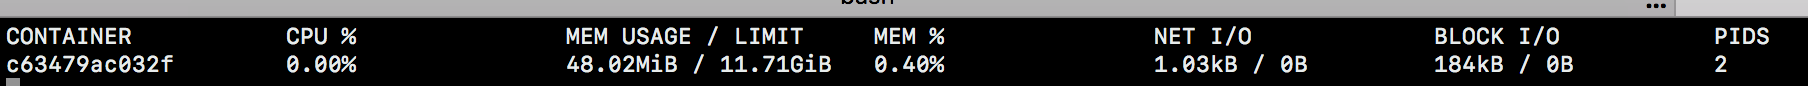

In [25]:
Image('lib/images/sklearn_.png')
#crop image

##### Final

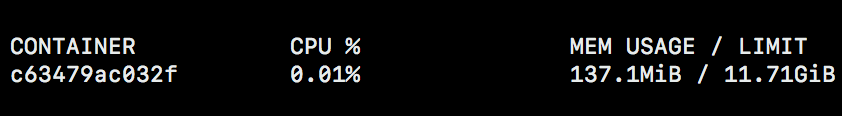

In [26]:
Image('lib/images/sklearn.png')

#### My Linear Regression Model

##### Initial

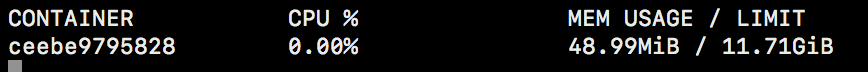

In [27]:
Image('lib/images/my_lr_.png')

##### Final

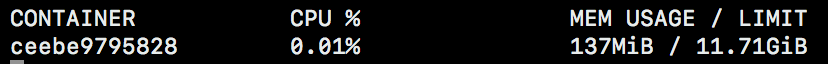

In [28]:
Image('lib/images/my_lr.png')

In [ ]:
import numpy as np

class Linear_Regression():
    '''
    Linear regression using ordinary least squares to determine the distance between points.
    '''

    def __init__(self):
        pass


    def fit(self, X=None, y=None, reg=False, alpha=None, dg_fr=None):
        '''Creates a line of best fit for the data using linear regression.

        Parameters:

            X: Data
            y: target
            reg: regularization
            alpha: regularization strength
            dg_fr: degrees of freedomm
        '''

        X, y = self.data_check(X,y)

        ones = np.ones(X.shape[0])
        
        X_ = np.column_stack((ones, X))


        if reg == False:
            self.betas = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)

            if alpha != None:
                print('In order to use the alpha parameter\
                regularization must be set to TRUE')

            if dg_fr != None:
                print('In order to use the degrees of freedom parameter\
                 regularization must be set to TRUE')

        if reg == True:

            if alpha == None:
                raise ValueError('Please select a value for alpha')

            dg_fr = X_.shape[1]
            inverse = np.linalg.inv
            self.betas = inverse(X_.T.dot(X_) + alpha * np.eye(dg_fr)).dot(X_.T).dot(y)

        return self.betas


    def score(self, X=None, y=None):
        '''
        Returns R2 score.
        '''

        X, y = self.data_check(X,y)

        y_pred = self.betas[0] + X.dot(self.betas[1:])

        RSS = ((y_pred - y) ** 2).sum()
        TSS = ((y - y.mean()) ** 2).sum()

        R2 = 1 - (RSS/TSS)

        return R2


    def data_check(self, X,y):

        '''
        Converts data to a numpy ndarray.
        '''

        if type(X) != np.ndarray:
            try:
                X = np.array(X)
        
            except:
                raise Exception('Failed to convert data to np.ndarray')
        if type(y) != np.ndarray:
            try:
                y = np.array(y)
              
            except:
                raise Exception('Failed to convert target to np.ndarray')

        return X, y



